# Analysis notebook

In [1]:
from climateforcing.utils import mkdir_p

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
scenarios = ["ssp245_constant-2020-ch4", "ch4_30", "ch4_40", "ch4_50", "coal-phase-out"]
temperature = {}
mkdir_p('../figures/')

In [3]:
#pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['figure.dpi'] = 150
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['figure.facecolor'] = 'white'
#pl.rcParams['ytick.labelright'] = True
#pl.rcParams['ytick.major.size'] = 0
#pl.rcParams['ytick.major.pad'] = -56
#pl.rcParams['xtick.top'] = False

In [4]:
for scenario in scenarios:
    temperature[scenario] = pd.read_csv('../data_output/fair_temperatures/{}.csv'.format(scenario), index_col='year')

In [5]:
longnames = {
    'ssp245_constant-2020-ch4': 'NDC-like',
    'ch4_30': 'Methane -30%',
    'ch4_40': 'Methane -40%',
    'ch4_50': 'Methane -50%',
    'coal-phase-out': 'Methane -30% & coal phase-out',
}

colors = {
    'ssp245_constant-2020-ch4': '#b0b0b0',
    'ch4_30': '#ff9999',
    'ch4_40': '#ff7c7c',
    'ch4_50': '#ff6666',
    'coal-phase-out': '#404040',
}

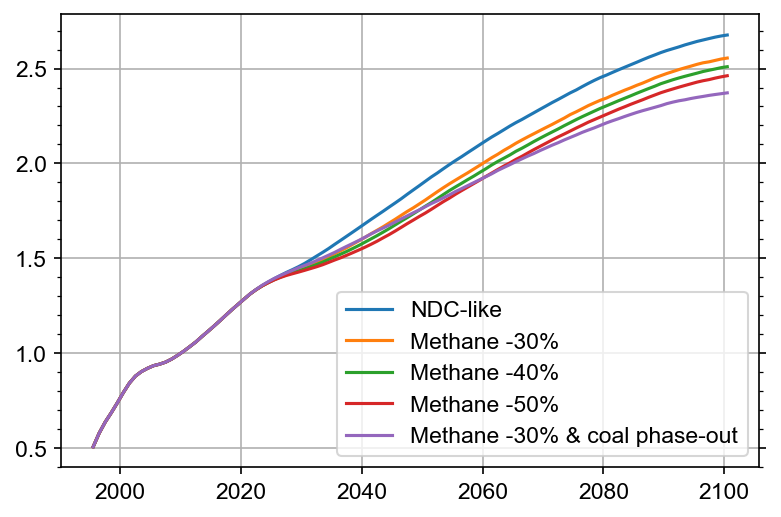

In [6]:
for scenario in scenarios:
    pl.plot(np.arange(1995.5,2101), np.percentile(temperature[scenario], 50, axis=1), label=longnames[scenario])
#pl.xlim(2015, 2050)
#pl.ylim(1.1, 1.9)
pl.legend()
pl.grid()

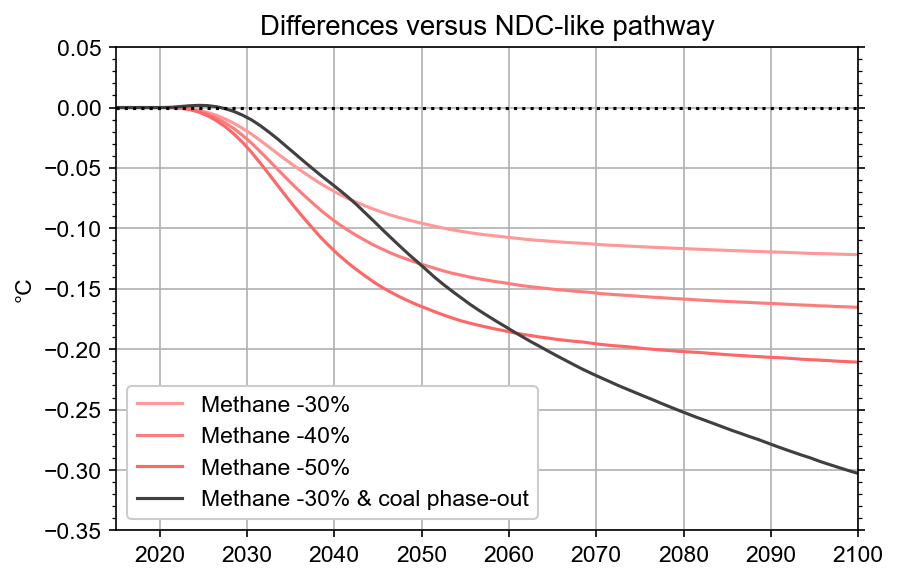

In [7]:
for scenario in scenarios[1:]:
    pl.plot(
        np.arange(1995.5,2101), 
        np.percentile(temperature[scenario]-temperature['ssp245_constant-2020-ch4'], 50, axis=1),
        label=longnames[scenario],
        color=colors[scenario],
    )

pl.legend(framealpha=1)
pl.grid()
pl.title('Differences versus NDC-like pathway')
pl.ylabel('°C')
pl.tight_layout()
pl.xlim(2015, 2100)
pl.ylim(-0.35,+0.05)
pl.axhline(0, ls=':', color='k')
pl.savefig('../figures/difference-versus-ssp245.png')
pl.savefig('../figures/difference-versus-ssp245.pdf')

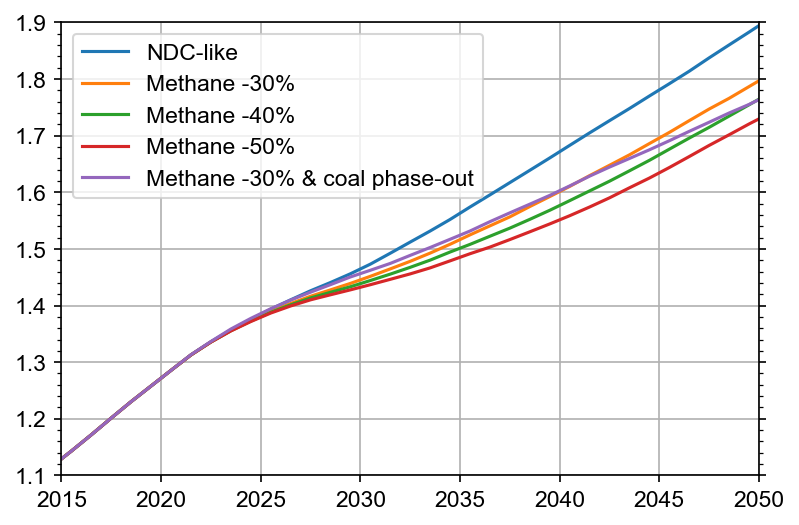

In [8]:
for scenario in scenarios:
    pl.plot(np.arange(1995.5,2101), np.percentile(temperature[scenario], 50, axis=1), label=longnames[scenario])
pl.xlim(2015, 2050)
pl.ylim(1.1, 1.9)
pl.legend()
pl.grid()

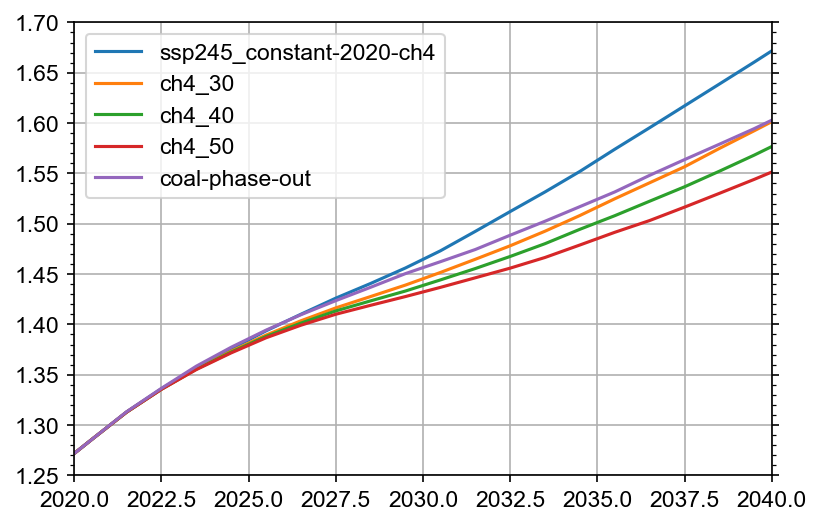

In [9]:
for scenario in scenarios:
    pl.plot(np.arange(1995.5,2101), np.percentile(temperature[scenario], 50, axis=1), label=scenario)
pl.xlim(2020, 2040)
pl.ylim(1.25, 1.7)
pl.legend()
pl.grid()

In [10]:
pl.rcParams['xtick.major.bottom'] = False

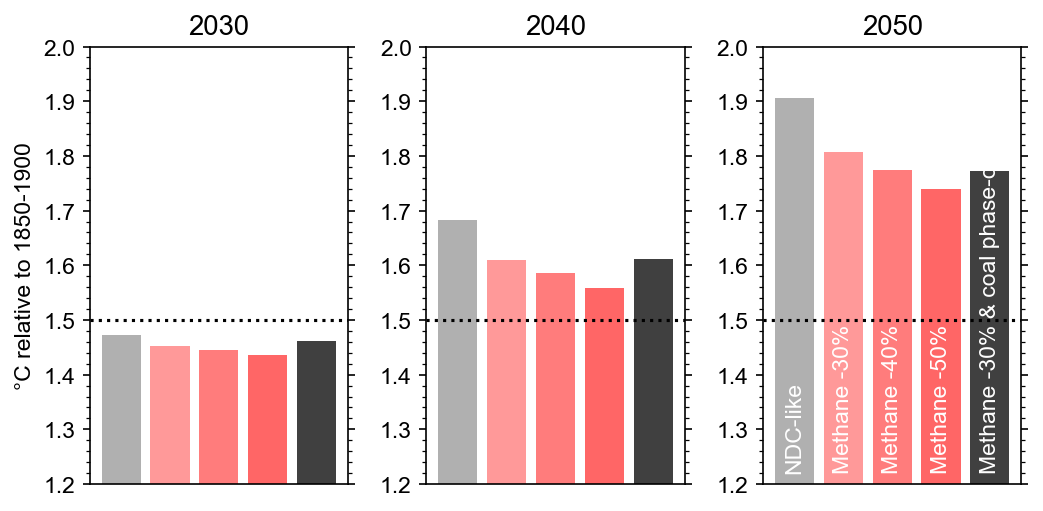

In [11]:
fig, ax = pl.subplots(1, 3, figsize=(18/2.54, 9/2.54))

for iscen, scenario in enumerate(scenarios):
    ax[0].bar(iscen, np.percentile(temperature[scenario].values[35,:], 50), color=colors[scenario])
    ax[1].bar(iscen, np.percentile(temperature[scenario].values[45,:], 50), color=colors[scenario])
    ax[2].bar(iscen, np.percentile(temperature[scenario].values[55,:], 50), color=colors[scenario])
#    ax[0].text(iscen-0.2, 1.22, longnames[scenario], color='w', rotation=90, ha='left', va='bottom')
#    ax[1].text(iscen-0.2, 1.22, longnames[scenario], color='w', rotation=90, ha='left', va='bottom')
    ax[2].text(iscen-0.2, 1.22, longnames[scenario], color='w', rotation=90, ha='left', va='bottom')
    
ax[0].set_ylabel('°C relative to 1850-1900')
ax[0].set_title(2030)
ax[1].set_title(2040)
ax[2].set_title(2050)
ax[0].axhline(1.5, ls=':', color='k')
ax[0].set_ylim(1.2, 2.0)
ax[1].axhline(1.5, ls=':', color='k')
ax[1].set_ylim(1.2, 2.0)
ax[2].axhline(1.5, ls=':', color='k')
ax[2].set_ylim(1.2, 2.0)
pl.tight_layout()
pl.savefig('../figures/bar_absolute.png')
pl.savefig('../figures/bar_absolute.pdf')

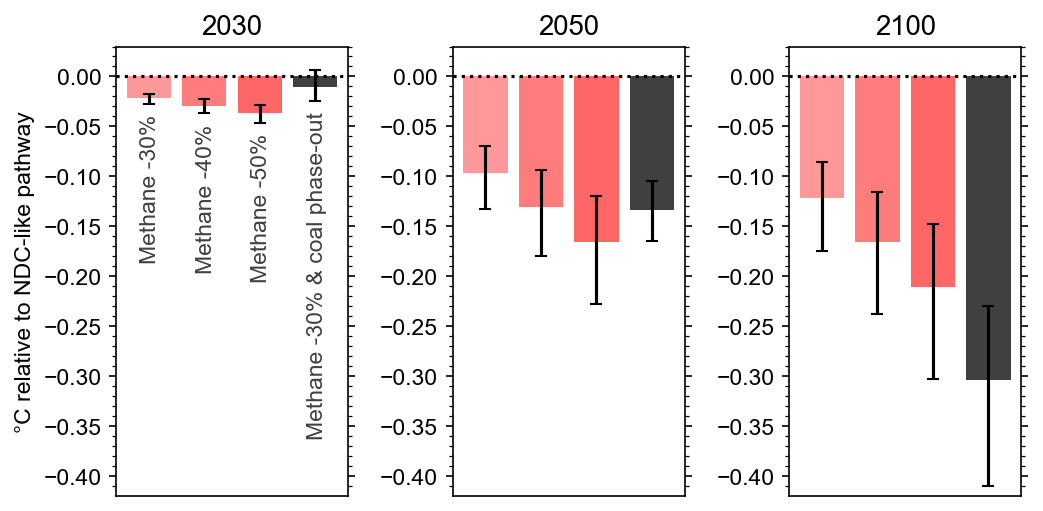

In [12]:
fig, ax = pl.subplots(1, 3, figsize=(18/2.54, 9/2.54))

ax0val = np.zeros(4)

for iscen, scenario in enumerate(scenarios[1:]):
    p05, p50, p95 = np.percentile(temperature[scenario].values[35,:] - temperature['ssp245_constant-2020-ch4'].values[35,:], (5, 50, 95))
    ax[0].bar(iscen, p50, color=colors[scenario])
    ax0val[iscen] = p05
    ax[0].errorbar(iscen, p50, yerr=np.array([p50-p05, p95-p50]).reshape((2,1)), capsize=3, color='k')
    
    p05, p50, p95 = np.percentile(temperature[scenario].values[55,:] - temperature['ssp245_constant-2020-ch4'].values[55,:], (5, 50, 95))
    ax[1].bar(iscen, p50, color=colors[scenario])
    ax[1].errorbar(iscen, p50, yerr=np.array([p50-p05, p95-p50]).reshape((2,1)), capsize=3, color='k')
    
    p05, p50, p95 = np.percentile(temperature[scenario].values[105,:] - temperature['ssp245_constant-2020-ch4'].values[105,:], (5, 50, 95))
    ax[2].bar(iscen, p50, color=colors[scenario])
    ax[2].errorbar(iscen, p50, yerr=np.array([p50-p05, p95-p50]).reshape((2,1)), capsize=3, color='k')

    ax[0].text(iscen-0.15, np.min((ax0val[iscen]-0.01, -0.01)), longnames[scenario], color='#404040', rotation=90, ha='left', va='top')
    
# ax[1].text(-0.15, ax1val[0]+0.005, '-30%', color='w', rotation=90, ha='left', va='bottom')
# ax[1].text(0.85, ax1val[1]+0.005, '-40%', color='w', rotation=90, ha='left', va='bottom')    
# ax[1].text(1.85, ax1val[2]+0.005, '-50%', color='w', rotation=90, ha='left', va='bottom')
# ax[1].text(1, -0.14, 'Methane', ha='center', va='bottom')
# ax[1].text(2.85, -0.14, 'Zero deforestation', rotation=90, ha='left', va='bottom')
# ax[1].text(3.85, -0.14, 'Coal phase-out', rotation=90, ha='left', va='bottom')
# ax[1].text(4.85, ax1val[5]+0.005, 'All', color='w', rotation=90, ha='left', va='bottom')
    
ax[0].set_yticks(np.arange(-0.4, 0.02, 0.05))
ax[1].set_yticks(np.arange(-0.4, 0.02, 0.05))
ax[2].set_yticks(np.arange(-0.4, 0.02, 0.05))

ax[0].set_ylabel('°C relative to NDC-like pathway')
ax[0].set_title(2030)
ax[1].set_title(2050)
ax[2].set_title(2100)

ax[0].axhline(0, ls=':', color='k')
ax[0].set_ylim(-0.42, +0.03)
ax[1].axhline(0, ls=':', color='k')
ax[1].set_ylim(-0.42, +0.03)
ax[2].axhline(0, ls=':', color='k')
ax[2].set_ylim(-0.42, +0.03)

pl.tight_layout()
pl.savefig('../figures/bar_relative.png')
pl.savefig('../figures/bar_relative.pdf')